In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.visuz import cluster

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

In [3]:
df=pd.read_csv("mcdonalds.csv")

In [4]:
print(df.shape)

(1453, 15)


In [5]:
print(df.head(4))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No    2   51  Every three months  Female  
2         No    1   62  Every three months  Female  
3        Yes    4   69         Once a week  Female  


In [6]:
segmentation_columns = df.columns[:11]
MD_x = df[segmentation_columns]

MD_x = (MD_x == "Yes").astype(int)

average_values = MD_x.mean()

print(round(average_values, 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [7]:
MD_x=df.iloc[:,0:11].map(lambda x:1 if x=="Yes" else 0)
col_means=np.mean(MD_x, axis=0)
round_means=np.round(col_means,2)
print(round_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [8]:
# determining the principle components
pca=PCA()
MD_pca=pca.fit_transform(MD_x)

MD_pca_df = pd.DataFrame(data=MD_pca, columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])])

print("\nImportance of Components:")
print(MD_pca_df)


Importance of Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.425367  0.219079 -0.663255 -0.401300 -0.201705  0.389767 -0.211982   
1     0.218638 -0.388190  0.730827 -0.094724 -0.044669  0.086596 -0.095877   
2    -0.375415 -0.730435  0.122040  0.692262 -0.839643  0.687406  0.583112   
3     0.172926  0.352752  0.843795  0.206998  0.681415  0.036133 -0.054284   
4    -0.187057  0.807610 -0.028537  0.548332 -0.854074  0.097305 -0.457043   
...        ...       ...       ...       ...       ...       ...       ...   
1448 -1.550242 -0.275031  0.013737  0.200604  0.145063 -0.306575 -0.075308   
1449  0.957339 -0.014308 -0.303843  0.444350  0.133690 -0.381804 -0.326432   
1450  0.185894 -1.062662 -0.220857 -0.467643  0.187757  0.192703 -0.091597   
1451  1.182064  0.038570 -0.561561  0.701126 -0.047645 -0.193687 -0.027335   
1452 -1.550242 -0.275031  0.013737  0.200604  0.145063 -0.306575 -0.075308   

           PC8       PC9      PC10  

In [9]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=df.columns[:11])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations (1, .., p=11):")
print(std_devs)
print("Rotation matrix (11 x 11):")
print(rotations_df)

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation matrix (11 x 11):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy       0.5 -0.4  0.3  0.1  0.3 -0.2 -0.3 -0.0 -0.6   0.1  -0.0
convenient  0.2 -0.0  0.1 -0.1 -0.3  0.3 -0.1  0.1  0.0   0.7   0.5
spicy       0.0 -0.0  0.0  0.2 -0.1  0.4  0.7 -0.4 -0.4   0.1  -0.1
fattening  -0.1  0.0  0.3 -0.4  0.1  0.4 -0.4 -0.6  0.2   0.0  -0.3
greasy     -0.3  0.1  0.8  0.3 -0.4 -0.2  0.0  0.1  0.0  -0.0  -0.0
fast        0.1  0.1  0.1 -0.1 -0.1  0.6 -0.1  0.6 -0.2  -0.2  -0.3
cheap       0.3  0.6  0.1  0.1  0.1  0.1 -0.0 -0.1 -0.1  -0.4   0.5
tasty       0.5 -0.3  0.3 -0.0  0.2  0.1  0.4  0.1  0.6  -0.1  -0.0
expensive  -0.3 -0.6 -0.0  0.1  0.0  0.3 -0.1 -0.0 -0.1  -0.5   0.5
healthy     0.2 -0.1 -0.2  0.8 -0.3  0.2 -0.3 -0.2  0.2   0.0  -0.2
disgusting -0.4  0.1  0.1  0.4  0.7  0.2 -0.0  0.2  0.1   0.3   0.0


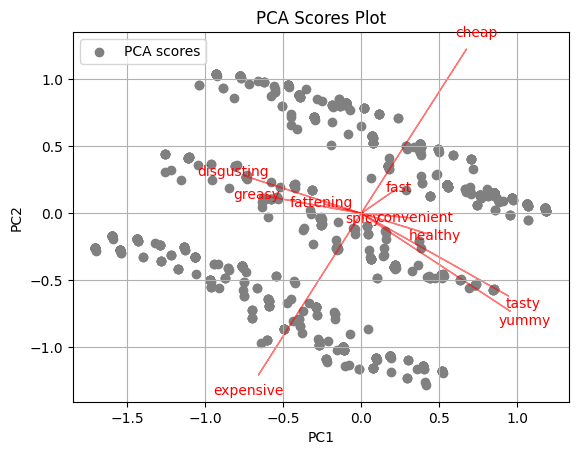

In [10]:
#  pcs scores showing clusters
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', label='PCA scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot')

def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='r', alpha=0.5)
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='r', ha='center', va='center')

feature_names = df.columns[:11]
plot_proj_axes(rotations[:, :2], feature_names)

plt.legend()
plt.grid()
plt.show()


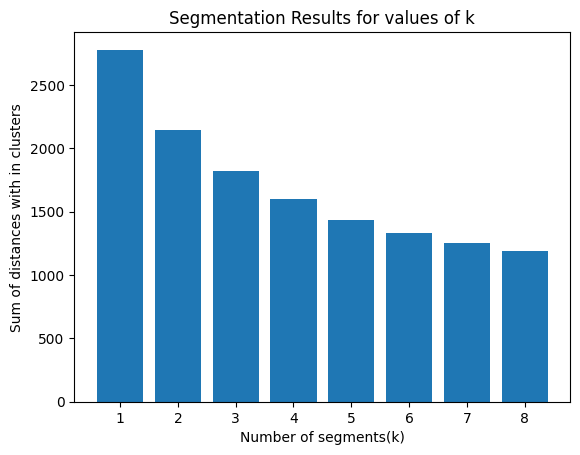

In [11]:
# using k-means and determinig clusters
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans
    
plt.bar(num_segments, within_cluster_distances,)
plt.xlabel("Number of segments(k)")
plt.ylabel("Sum of distances with in clusters")
plt.title("Segmentation Results for values of k")
plt.show()

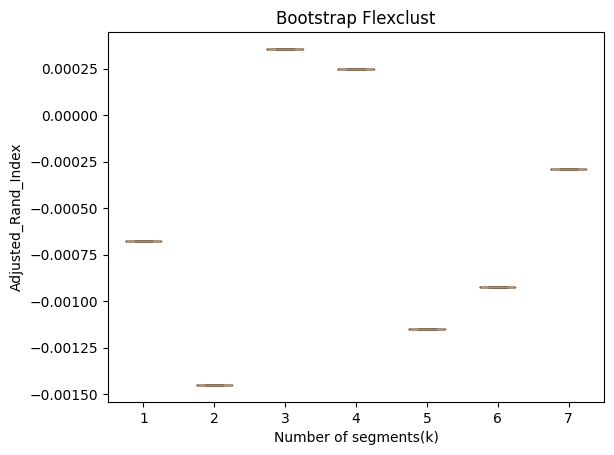

In [12]:
# resampling k-means with bootstrap
np.random.seed(1234) 
nboot = 100  
nrep = 10  

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x.values, random_state=1234) 
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)  
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# boxplot
plt.boxplot(adjusted_rand_index,whis=10)
plt.xlabel("Number of segments(k)")
plt.ylabel("Adjusted_Rand_Index")
plt.title("Bootstrap Flexclust")
plt.show()

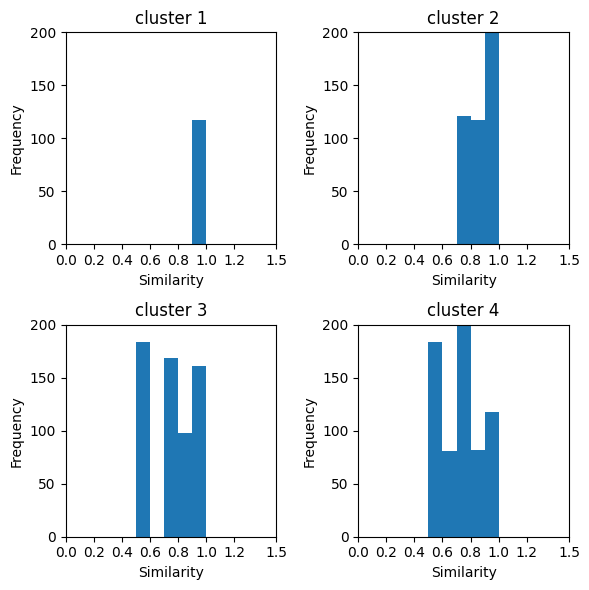

In [13]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(6, 6))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(0, 1.5)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.5])

plt.tight_layout()
plt.show()

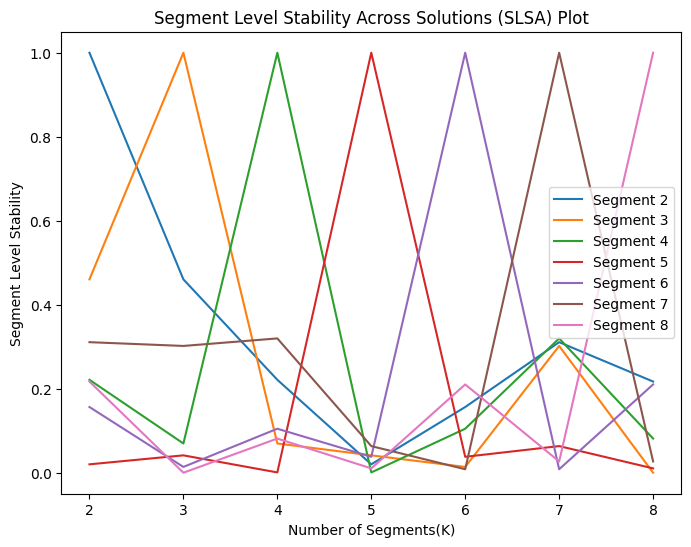

In [14]:
# SLSA plot
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)
    
plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], label=f'Segment {segment}')

plt.xlabel('Number of Segments(K)')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.show()

In [15]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)
    
segment_labels

{'2': array([1, 0, 0, ..., 0, 0, 1], dtype=int32),
 '3': array([2, 1, 1, ..., 1, 0, 2], dtype=int32),
 '4': array([0, 3, 3, ..., 3, 2, 1], dtype=int32),
 '5': array([4, 1, 2, ..., 2, 3, 0], dtype=int32)}

In [16]:
segment_similarities

{'2': array([1.18700649, 1.03060963, 1.83763118, ..., 1.12682984, 1.27986291,
        1.28015113]),
 '3': array([1.18819649, 1.05436747, 1.50713439, ..., 0.7453038 , 1.14333643,
        1.31518757]),
 '4': array([1.2474978 , 1.04053309, 1.53455564, ..., 0.7163022 , 1.08795365,
        0.92313062]),
 '5': array([1.24359844, 0.96719367, 1.58115844, ..., 0.61802246, 0.97175595,
        0.92616889])}

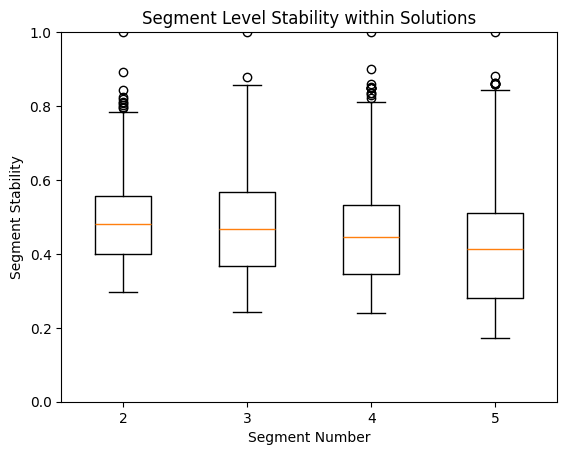

In [17]:
# SLSW using boxplot
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities) 
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

In [18]:
# mixing models  
from scipy.stats import entropy

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    
    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0    10       True  2   2 -2146.062044  4296.124088  4306.686859  4306.015908
1     5       True  3   3 -1896.330266  3798.660532  3814.504689  3813.529671
2     9       True  4   4 -1603.913802  3215.827604  3236.953147  3235.627738
3     9       True  5   5 -1502.697153  3015.394306  3041.801234  3040.267284
4     7       True  6   6 -1348.665399  2709.330799  2741.019113  2739.277954
5    10       True  7   7 -1249.233890  2512.467780  2549.437480  2547.530062
6     9       True  8   8 -1203.646165  2423.292330  2465.543415  2463.533662


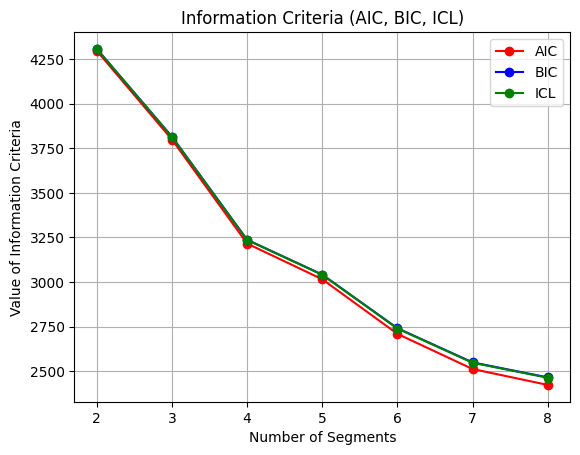

In [19]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='o', label='AIC',color='red')
plt.plot(num_segments, BIC_values, marker='o', label='BIC',color='blue')
plt.plot(num_segments, ICL_values, marker='o', label='ICL',color='green')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3] 

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture    0    1    2    3
kmeans                     
0        546    0    1   33
1          0  213   11    4
2         46    3  265    8
3         29   38    0  256
kmeans   0   1   2   3
kmeans                
0       51  15  35  20
1       18   8  11  11
2       23   9  14  22
3       29   5  15  15


In [21]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 9.456781748071885
Log-likelihood for MD.m4: 3.642746401176581


In [22]:
reversed_table = df['Like'].value_counts().sort_index(ascending=False)

print("Reversed table:")
print(reversed_table)

Reversed table:
Like
I love it!+5    143
I hate it!-5    152
4               160
3               229
2               187
1               152
0               169
-4               71
-3               73
-2               59
-1               58
Name: count, dtype: int64


In [23]:
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)
df['Like.n'] = 6 - df['Like.n']

like_n_counts = df['Like.n'].value_counts().sort_index()

print(like_n_counts)

Like.n
1.0     143
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
11.0    152
Name: count, dtype: int64


In [24]:
from patsy import dmatrices

independent_vars = df.columns[0:11] 

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [25]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose = False)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 985
2: 468


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0,
   np.float64(15.132745950421556),
   np.float64(15.132745950421556),
   0.0],
  [0.0, np.float64(13.820274961085254), np.float64(13.820274961085254), 0.0],
  [0.0,
   np.float64(16.837294569763987),
   np.float64(16.837294569763987),
   np.float64(13.820274961085254)],
  [0.0,
   np.float64(23.67244402390833),
   np.float64(23.67244402390833),
   np.float64(16.837294569763987)],
  [np.float64(15.132745950421556),
   np.float64(24.097479054882314),
   np.float64(24.097479054882314),
   np.float64(23.67244402390833)],
  [0.0, np.float64(18.303005217723125), np.float64(18.303005217723125), 0.0],
  [0.0,
   np.float64(22.260923119338788),
   np.float64(22.260923119338788)

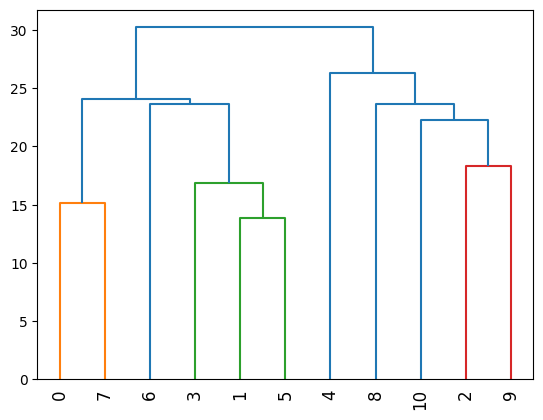

In [26]:
# heirarchial clustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

D = np.transpose(MD_x)
D = linkage(D, method = "average")
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

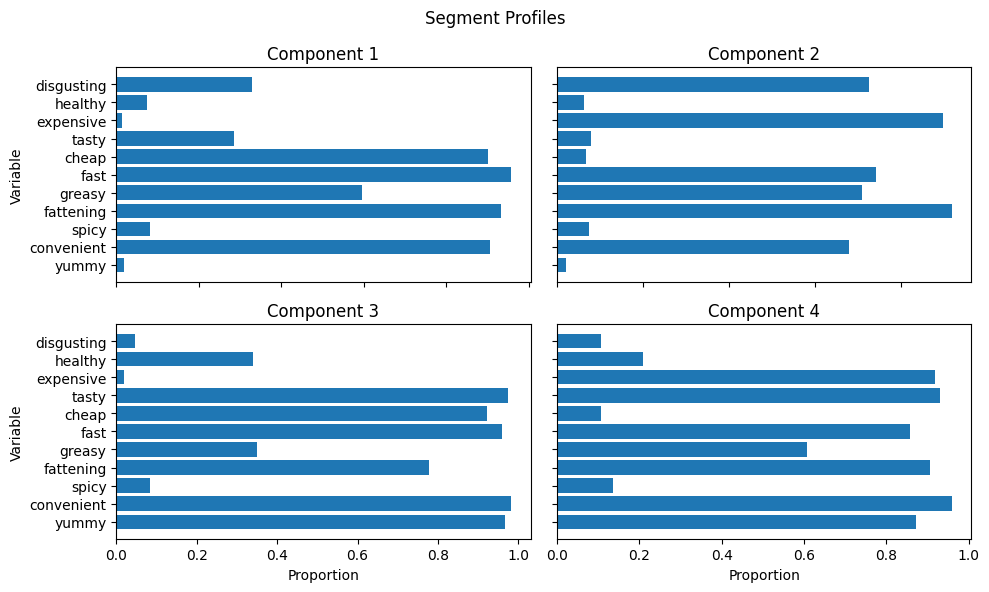

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

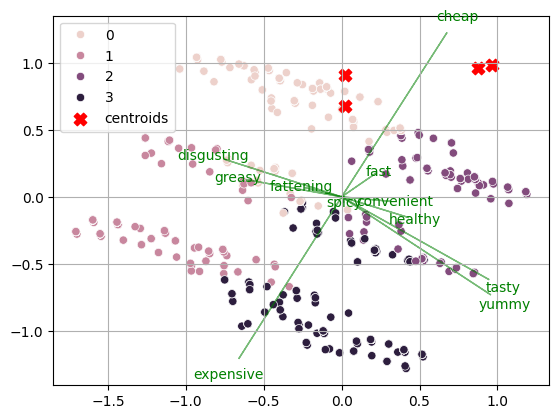

In [28]:
# showing the cluster solution
sns.scatterplot(data=df,x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")

def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='g', alpha=0.5)
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='g', ha='center', va='center')

feature_names = df.columns[:11]
plot_proj_axes(rotations[:, :2], feature_names)

plt.legend()
plt.grid(True)
plt.show()

In [29]:
# segment description
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

df1=pd.read_csv("mcdonalds.csv")

def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = df1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_ 
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,Female,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,Female,3
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,Male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,1
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,Female,3
1450,1,1,0,1,0,1,0,1,1,0,0,3,52,Once a month,Female,1
1451,1,1,0,0,0,1,1,1,0,1,0,4,41,Every three months,Male,3


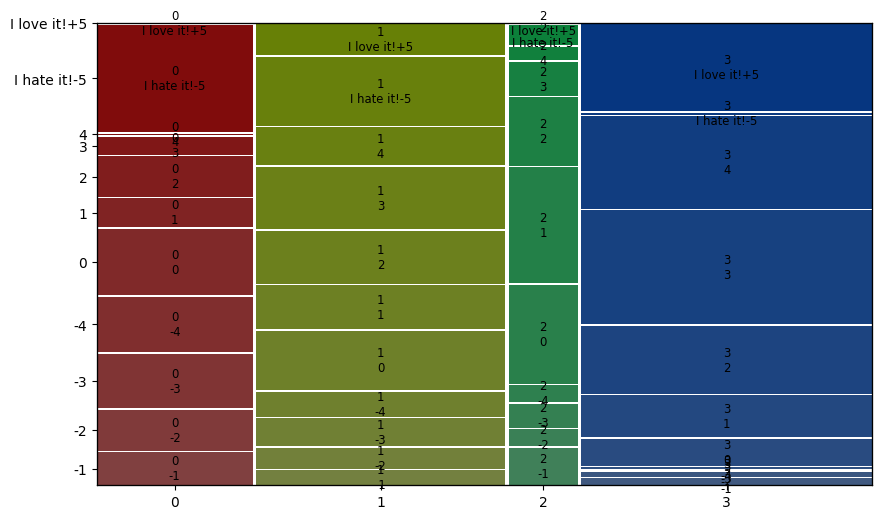

In [30]:
plt.rcParams['figure.figsize'] = (10,6)
mosaic(crosstab.stack())
plt.show()

In [31]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct

Gender,Female,Male
row_0,,
0,213,151
1,101,139
2,324,209
3,150,166


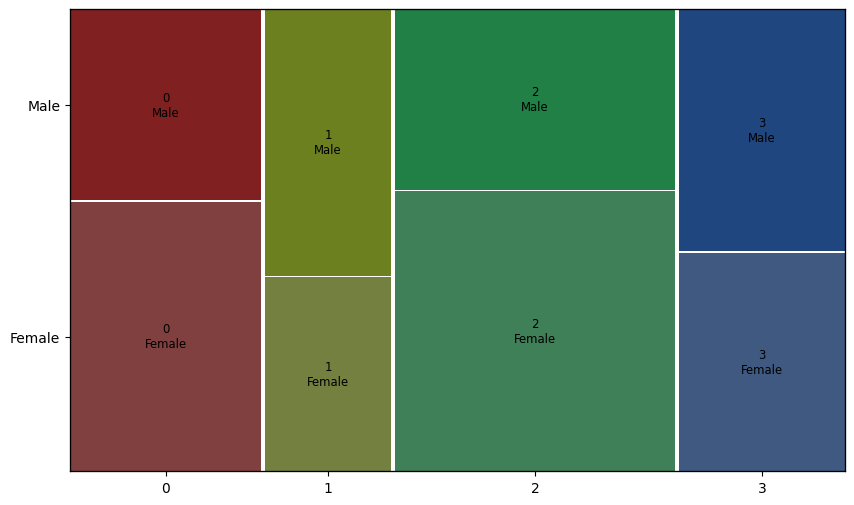

In [32]:
mosaic(ct.stack(),gap=0.005)
plt.show()

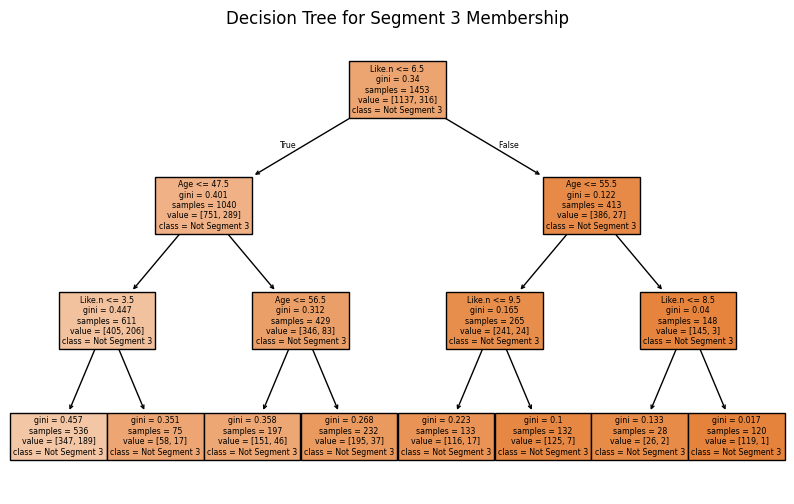

In [33]:
# membership plot
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = df[['Like.n', 'Age']]  
y = (k4==3).astype(int)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Decision Tree for Segment 3 Membership")
plt.show()

In [34]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.787162
1,1,2.596195
2,2,2.618321
3,3,2.598553


In [35]:
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,4.641892
1,1,5.839323
2,2,4.549618
3,3,7.097649


In [36]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.432432
1,1,0.547569
2,2,0.427481
3,3,0.401447


In [37]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.432432,4.641892,2.787162
1,1,0.547569,5.839323,2.596195
2,2,0.427481,4.549618,2.618321
3,3,0.401447,7.097649,2.598553


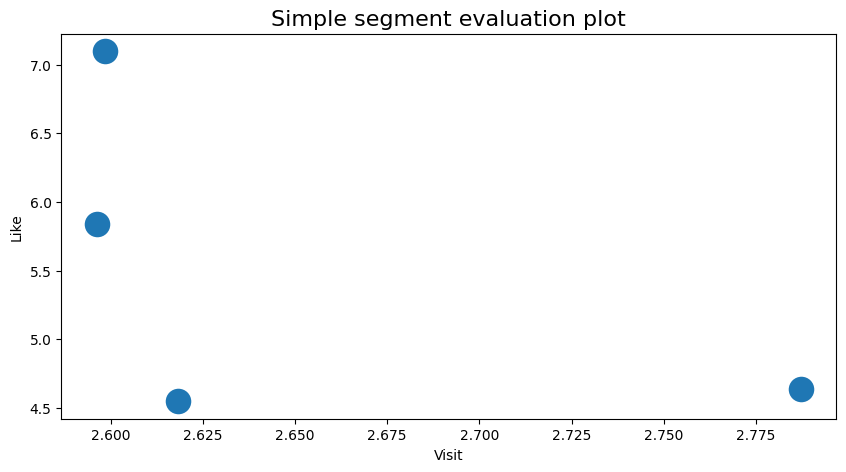

In [38]:
# segment evalutaion
plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400)
plt.title("Simple segment evaluation plot",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()